In [9]:
import pandas as pd

In [10]:
import numpy as np

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
from sklearn.tree import export_graphviz

In [14]:
import pydot

In [15]:
import matplotlib.pyplot as plt

In [16]:
ML_Asthma = pd.read_csv('ML_Asthma.csv')
ML_Asthma.head(5)

,SPT,FeNO,FVC_pre,FEV1_pre,FEF2575_pre,FEV1FVC_pre,FVC_pos,FEV1_pos,FEF2575_pos,FEV1FVC_pos,M_age,F_age,Age,Weight,Gender,Height,BMI,REV_ml,GOLD_Dx
0,1,41.0,1.42,1.28,1.50,90.1,1.56,1.42,1.73,91.0,24,25,8,26.6,0,140,13.571429,0.14,0
1,0,56.0,2.02,1.82,2.20,90.1,2.20,2.08,2.70,94.5,29,25,9,39.8,0,146,18.671421,0.26,1
2,0,9.0,1.63,1.54,2.36,94.5,1.63,1.63,2.72,100.0,24,27,8,35.0,0,132,20.087236,0.09,0
3,0,0.0,1.92,1.67,1.85,87.0,1.95,1.65,2.14,84.6,25,27,9,30.6,1,142,15.175560,-0.02,0
4,0,11.0,1.71,1.57,2.12,91.8,1.75,1.63,2.26,93.1,26,27,8,36.7,0,132,21.100000,0.06,0


In [17]:
#Count the number of observations and variables:
print('The shape of our features is:', ML_Asthma.shape)

The shape of our features is: (617, 19)


In [18]:
#Descriptive statistics:
ML_Asthma.describe()

,SPT,FeNO,FVC_pre,FEV1_pre,FEF2575_pre,FEV1FVC_pre,FVC_pos,FEV1_pos,FEF2575_pos,FEV1FVC_pos,M_age,F_age,Age,Weight,Gender,Height,BMI,REV_ml,GOLD_Dx
count,617.00000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,0.34684,17.357536,1.917553,1.762853,2.326370,92.286224,1.949546,1.838185,2.573079,93.412480,38.439222,40.685575,8.706645,32.587520,0.486224,135.032415,17.721680,0.075332,0.111831
std,0.47635,20.464393,0.337396,0.286120,0.554245,5.372663,0.345903,0.345411,0.560346,9.412772,5.807794,6.629210,0.797625,7.908822,0.500216,6.841118,3.188494,0.205628,0.315415
min,0.00000,0.000000,0.990000,0.990000,0.760000,71.600000,0.990000,0.000000,0.000000,0.000000,24.000000,25.000000,7.000000,20.000000,0.000000,120.000000,12.244898,-1.370000,0.000000
25%,0.00000,6.000000,1.690000,1.580000,1.920000,88.900000,1.710000,1.630000,2.180000,91.400000,35.000000,36.000000,8.000000,27.100000,0.000000,130.000000,15.408737,0.000000,0.000000
50%,0.00000,11.000000,1.880000,1.750000,2.280000,92.600000,1.940000,1.830000,2.520000,94.600000,39.000000,40.000000,9.000000,30.800000,0.000000,135.000000,16.900000,0.060000,0.000000
75%,1.00000,20.000000,2.140000,1.940000,2.640000,96.300000,2.160000,1.990000,2.900000,97.500000,43.000000,44.000000,9.000000,36.700000,1.000000,139.000000,19.428691,0.120000,0.000000
max,1.00000,148.000000,3.300000,3.030000,4.390000,100.000000,3.240000,4.830000,4.310000,100.000000,66.000000,65.000000,12.000000,76.300000,1.000000,162.000000,34.367821,2.850000,1.000000


In [19]:
# Labels are the values we want to predict
labels = np.array(ML_Asthma['GOLD_Dx'])

In [20]:
# Remove the labels from the features:
# axis 1 refers to the columns:
ML_Asthma = ML_Asthma.drop('GOLD_Dx', axis = 1)

In [21]:
# Saving feature names for later use:
ML_Asthma_list = list(ML_Asthma.columns)

In [22]:
# Convert to numpy array:
ML_Asthma = np.array(ML_Asthma)

In [23]:
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets:
train_ML_Asthma, test_ML_Asthma, train_labels, test_labels = train_test_split(ML_Asthma, labels, test_size = 0.20, random_state = 42)

In [24]:
#Inspecting data if correct split:
print('Training Features Shape:', train_ML_Asthma.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_ML_Asthma.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (493, 18)
Training Labels Shape: (493,)
Testing Features Shape: (124, 18)
Testing Labels Shape: (124,)


In [25]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_ML_Asthma, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [26]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_ML_Asthma)

In [27]:
# Calculate the absolute errors:
errors = abs(predictions - test_labels)

In [28]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.1 degrees.


In [29]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [30]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


In [31]:
# Pull out one tree from the forest:
tree = rf.estimators_[5]

In [32]:
# Export the image to a dot file:
export_graphviz(tree, out_file = 'tree.dot', feature_names = ML_Asthma_list, rounded = True, precision = 1)

In [33]:
# Use dot file to create a graph:
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [34]:
# Write graph to a png file:
graph.write_png('tree.png')

In [35]:
# Limit depth of tree to 5 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 5)
rf_small.fit(train_ML_Asthma, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [36]:
# Extract the small tree
tree_small = rf_small.estimators_[5]

In [37]:
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = ML_Asthma_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [38]:
# Get numerical feature importances:
importances = list(rf.feature_importances_)

In [39]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(ML_Asthma_list, importances)]

In [40]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [41]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: REV_ml               Importance: 0.45
Variable: FeNO                 Importance: 0.07
Variable: FEF2575_pre          Importance: 0.06
Variable: FEF2575_pos          Importance: 0.05
Variable: BMI                  Importance: 0.05
Variable: FEV1FVC_pos          Importance: 0.04
Variable: FEV1_pos             Importance: 0.03
Variable: F_age                Importance: 0.03
Variable: Weight               Importance: 0.03
Variable: Gender               Importance: 0.03
Variable: Height               Importance: 0.03
Variable: FVC_pre              Importance: 0.02
Variable: FEV1_pre             Importance: 0.02
Variable: FEV1FVC_pre          Importance: 0.02
Variable: FVC_pos              Importance: 0.02
Variable: M_age                Importance: 0.02
Variable: Age                  Importance: 0.02
Variable: SPT                  Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [42]:
# New random forest with only the 3 most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

In [43]:
# Extract the 3 most important features
important_indices = [ML_Asthma_list.index('REV_ml'), ML_Asthma_list.index('FeNO'), ML_Asthma_list.index('FEF2575_pre')]
train_important = train_ML_Asthma[:, important_indices]
test_important = test_ML_Asthma[:, important_indices]

In [44]:
# Train the random forest
rf_most_important.fit(train_important, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [45]:
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

In [46]:
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.11 degrees.


In [47]:
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: nan %.


In [48]:
# Set the style
plt.style.use('fivethirtyeight')

In [49]:
# list of x locations for plotting
x_values = list(range(len(importances)))

Text(0.5, 1.0, 'Variable Importances')

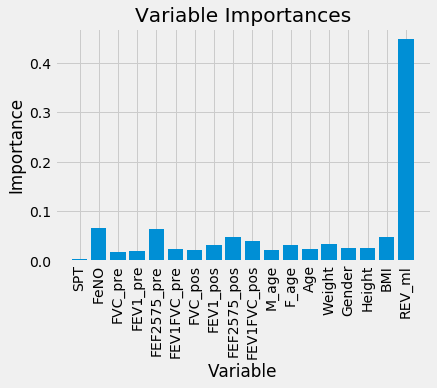

In [50]:
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, ML_Asthma_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')